#Part of Speech Tagging with Stop words
part-of-speech tagging (POS tagging or PoS tagging or POST), also called grammatical tagging or word-category disambiguation


In [ ]:
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:

Quote= "Happiness is not something ready made. It comes from your own actions."
  
# sent_tokenize is one of instances of  
# PunktSentenceTokenizer from the nltk.tokenize.punkt module 
  
tokenized = sent_tokenize(Quote) 
for i in tokenized: 
      
    # Word tokenizers is used to find the words  
    # and punctuation in a string 
    wordsList = nltk.word_tokenize(i) 
  
    # removing stop words from wordList 
    wordsList = [w for w in wordsList if not w in stop_words]  
  
    #  Using a Tagger. Which is part-of-speech  
    # tagger or POS-tagger.  
    tagged = nltk.pos_tag(wordsList) 
  
    print(tagged) 


[('The', 'DT'), ('boiling', 'NN'), ('water', 'NN'), ('softens', 'VBZ'), ('potato', 'NN'), ('hardens', 'NNS'), ('egg', 'NN'), ('.', '.')]
[('It', 'PRP'), ('’', 'VBZ'), ('’', 'JJ'), ('made', 'VBN'), ('.', '.')]
[('Not', 'RB'), ('circumstances', 'NNS'), ('.', '.')]


In [ ]:
import spacy 
# python -m spacy download en_core_web_sm 
nlp = spacy.load("en_core_web_sm") 

doc = nlp(Quote) 
  
# Token and Tag 
for token in doc: 
  print(token, token.pos_) 
  
# You want list of Verb tokens 
print("Verbs:", [token.text for token in doc if token.pos_ == "VERB"]) 

The DET
same ADJ
boiling NOUN
water NOUN
that DET
softens VERB
the DET
potato NOUN
hardens VERB
the DET
egg NOUN
. PUNCT
It PRON
’s VERB
what PRON
you PRON
’re VERB
made VERB
of ADP
. PUNCT
Not PART
the DET
circumstances NOUN
. PUNCT
Verbs: ['softens', 'hardens', '’s', '’re', 'made']


#Lemmatization with NLTK
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word. 


### Wordnet Lemmatizer with appropriate POS tag


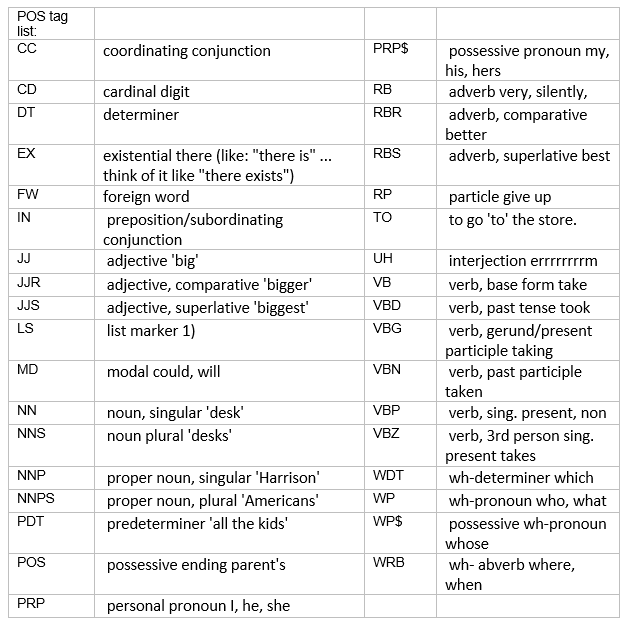


In [ ]:
nltk.download('averaged_perceptron_tagger')

sentence="The dried leaves are falling from trees because of autumn"

print(nltk.pos_tag(nltk.word_tokenize(sentence)))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[('The', 'DT'), ('dried', 'JJ'), ('leaves', 'NNS'), ('are', 'VBP'), ('falling', 'VBG'), ('from', 'IN'), ('trees', 'NNS'), ('because', 'IN'), ('of', 'IN'), ('autumn', 'NN')]


In [ ]:
print(nltk.pos_tag(nltk.word_tokenize(sentence)))

[('The', 'DT'), ('dried', 'JJ'), ('leaves', 'NNS'), ('are', 'VBP'), ('falling', 'VBG'), ('from', 'IN'), ('trees', 'NNS'), ('because', 'IN'), ('of', 'IN'), ('autumn', 'NN')]


In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
# Lemmatize with POS Tag
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()
# 2. Lemmatize a Sentence with the appropriate POS tag
sentence = "leaves are falling from trees because of autumn"
print([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)])

['leaf', 'be', 'fall', 'from', 'tree', 'because', 'of', 'autumn']


# Word Embedding

Word embedding is one of the most important techniques in natural language processing(NLP), where words are mapped to vectors of real numbers. Word embedding is capable of capturing the meaning of a word in a document, semantic and syntactic similarity, relation with other words. 

Applications of Word Embedding :

* Sentiment Analysis
* Speech Recognition
* Information Retrieval
* Question Answering

In [ ]:
#!pip install gensim
# importing all necessary modules 
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
  
warnings.filterwarnings(action = 'ignore') 
  
import gensim 
from gensim.models import Word2Vec 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
  
#  Reads ‘alice.txt’ file 
sample = open("drive/My Drive/procastinate/procastinate0.1.txt", "r") 
s = sample.read() 
s

"Overcoming procrastination\n- Procrastination is a habit, not a personality flaw, so you can put an end to putting it off. Stop that no progress slump. Protect your reputation and live free of the panic or careless work that comes from stalling. In this course, you'll identify jobs that land you in the procrastination zone. Explore why you procrastinate, and select customized strategies that address your reasons for stalling. Finish with a plan that makes you eight times more likely to take action. I'm Brenda Bailey-Hughes, and let's face it, those of us who need a course about procrastination are the ones most likely to put it off, so good for you for getting started. Without delay, jump in and say goodbye to procrastination."

In [ ]:
# Replaces escape character with space 
f = s.replace("\n", " ") 
  
data = [] 
  
# iterate through each sentence in the file 
for i in sent_tokenize(f): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i): 
        temp.append(j.lower()) 
  
    data.append(temp) 
  
# Create CBOW model 
model1 = gensim.models.Word2Vec(data, min_count = 1,  
                              size = 100, window = 5) 
  
# Print results 
print("Cosine similarity between 'procrastinate' " + 
               "and  'pawn' - CBOW : ", 
    model1.similarity('procrastinate', 'habit')) 
      
print("Cosine similarity between 'alice' " +
                 "and 'machines' - CBOW : ", 
      model1.similarity('procrastinate', 'stalling')) 
  
# Create Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, 
                                             window = 5, sg = 1) 
  
# Print results 
print("Cosine similarity between 'procrastinate' " + 
               "and  'pawn' using Skip Gram model : ", 
    model2.similarity('procrastinate', 'habit')) 
      
print("Cosine similarity between 'alice' " +
                 "and 'machines' using Skip Gram model: ", 
      model2.similarity('procrastinate', 'stalling')) 

Cosine similarity between 'procrastinate' and  'pawn' - CBOW :  0.039908547
Cosine similarity between 'alice' and 'machines' - CBOW :  0.09022687
Cosine similarity between 'procrastinate' and  'pawn' using Skip Gram model :  0.03908985
Cosine similarity between 'alice' and 'machines' using Skip Gram model:  0.09043414
